In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree 
from sklearn import preprocessing
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Part 1: Text cleaning

## Data Exploration

In [2]:
News_DF=pd.read_csv('News_Headline.csv', error_bad_lines=False, encoding='latin-1')

D:\anaconda3\envs\tensorflow1\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
News_DF

,category,headline,links,short_description,keywords,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,POLITICS,GOP Congressman Suggests Looser Standard Of Pr...,https://www.huffingtonpost.com/entry/zeldin-mu...,"Rep. Lee Zeldin says there needs to be ""some t...",zeldin-muslims-reasonable-suspicion,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,POLITICS,The ACLU Is Suing To Strike Down Ohio's Congre...,https://www.huffingtonpost.com/entry/ohio-cong...,The civil liberties group says Ohio's map is s...,ohio-congressional-map-gerrymandering,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,POLITICS,Don't Like The New Climate Rules? Thank Congress.,https://www.huffingtonpost.com/entry/congress-...,Legislators could have passed a climate change...,congress-climate-rules-emissions,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,POLITICS,The Story Behind An Iconic Picture Of Civil Ri...,https://www.huffingtonpost.com/entry/how-julia...,An often-forgotten battle for free speech righ...,how-julian-bond-fought-georgia-all-the-way-to-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,POLITICS,Pro-Abortion Rights Progressive Wins Nebraska ...,https://www.huffingtonpost.com/entry/kara-east...,Kara Eastman prevailed against an establishmen...,kara-eastman-wins-nebraska-democratic-primary,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
44905,SPORTS,This Baseball Team Learned There's AÂ Wrong Wa...,https://www.huffingtonpost.com/entry/san-jose-...,Many fans were pissed after seeing the minor l...,san-jose-giants-japanese-heritage-night,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44906,SPORTS,Some Young Spurs Fan Dabbed 38 Times In A Sing...,https://www.huffingtonpost.com/entry/dab-kid-s...,"Never change, young man. Never change.",dab-kid-san-antonio-spurs,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44907,SPORTS,Rasheed Wallace Ejected From Knicks-Suns Game ...,https://www.huffingtonpost.com/entry/rasheed-w...,Wallace was hit with a first technical for a h...,rasheed-wallace-ejected-knicks-suns-ball-dont-lie,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44908,SPORTS,Why Jake Plummer And Other NFL Players Are Pus...,https://www.huffingtonpost.comhttp://extras.de...,They believe CBD could be an alternative to po...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove empty columns:

In [4]:
News_DF = News_DF.drop(columns=['Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11'])

In [5]:
News_DF

,category,headline,links,short_description,keywords
0,POLITICS,GOP Congressman Suggests Looser Standard Of Pr...,https://www.huffingtonpost.com/entry/zeldin-mu...,"Rep. Lee Zeldin says there needs to be ""some t...",zeldin-muslims-reasonable-suspicion
1,POLITICS,The ACLU Is Suing To Strike Down Ohio's Congre...,https://www.huffingtonpost.com/entry/ohio-cong...,The civil liberties group says Ohio's map is s...,ohio-congressional-map-gerrymandering
2,POLITICS,Don't Like The New Climate Rules? Thank Congress.,https://www.huffingtonpost.com/entry/congress-...,Legislators could have passed a climate change...,congress-climate-rules-emissions
3,POLITICS,The Story Behind An Iconic Picture Of Civil Ri...,https://www.huffingtonpost.com/entry/how-julia...,An often-forgotten battle for free speech righ...,how-julian-bond-fought-georgia-all-the-way-to-...
4,POLITICS,Pro-Abortion Rights Progressive Wins Nebraska ...,https://www.huffingtonpost.com/entry/kara-east...,Kara Eastman prevailed against an establishmen...,kara-eastman-wins-nebraska-democratic-primary
...,...,...,...,...,...
44905,SPORTS,This Baseball Team Learned There's AÂ Wrong Wa...,https://www.huffingtonpost.com/entry/san-jose-...,Many fans were pissed after seeing the minor l...,san-jose-giants-japanese-heritage-night
44906,SPORTS,Some Young Spurs Fan Dabbed 38 Times In A Sing...,https://www.huffingtonpost.com/entry/dab-kid-s...,"Never change, young man. Never change.",dab-kid-san-antonio-spurs
44907,SPORTS,Rasheed Wallace Ejected From Knicks-Suns Game ...,https://www.huffingtonpost.com/entry/rasheed-w...,Wallace was hit with a first technical for a h...,rasheed-wallace-ejected-knicks-suns-ball-dont-lie
44908,SPORTS,Why Jake Plummer And Other NFL Players Are Pus...,https://www.huffingtonpost.comhttp://extras.de...,They believe CBD could be an alternative to po...,NaN


<AxesSubplot:ylabel='category'>

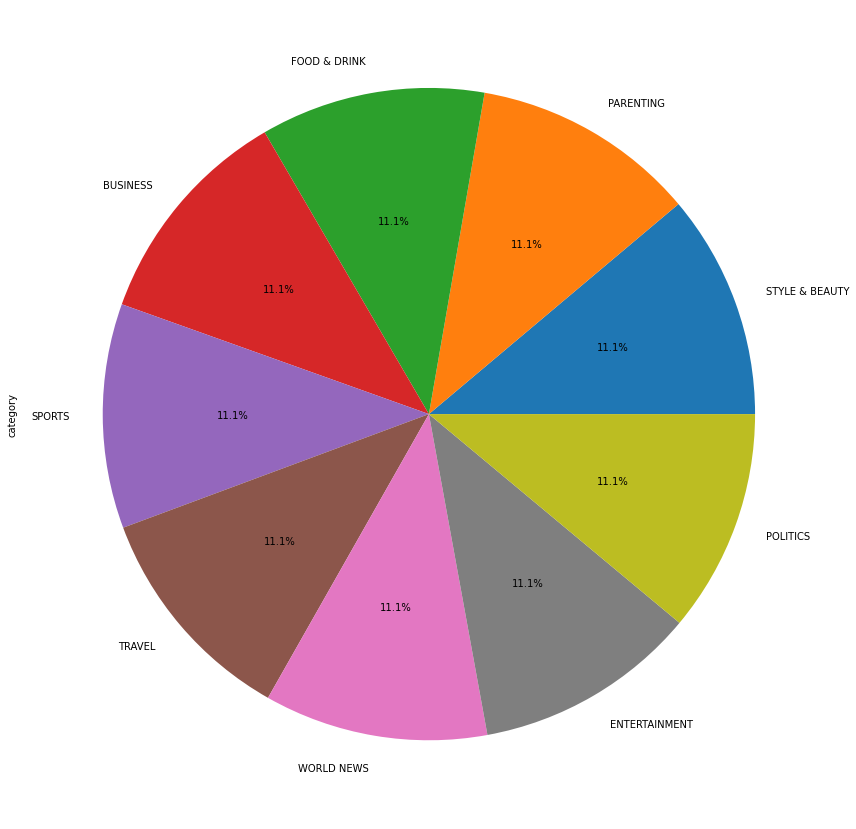

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
News_DF['category'].value_counts().plot.pie( autopct = '%1.1f%%')

For our text classifier, we will use data from the headline and the description as input.

In [7]:
News_DF['text'] = News_DF.headline + ". " + News_DF.short_description

In [8]:
type(News_DF['text'][0])

str

In [9]:
News_DF['text'][1]

"The ACLU Is Suing To Strike Down Ohio's Congressional Map. The civil liberties group says Ohio's map is so heavily gerrymandered, it violates the Constitution."

In [10]:
News_DF['headline'][1]

"The ACLU Is Suing To Strike Down Ohio's Congressional Map"

In [11]:
News_DF

,category,headline,links,short_description,keywords,text
0,POLITICS,GOP Congressman Suggests Looser Standard Of Pr...,https://www.huffingtonpost.com/entry/zeldin-mu...,"Rep. Lee Zeldin says there needs to be ""some t...",zeldin-muslims-reasonable-suspicion,GOP Congressman Suggests Looser Standard Of Pr...
1,POLITICS,The ACLU Is Suing To Strike Down Ohio's Congre...,https://www.huffingtonpost.com/entry/ohio-cong...,The civil liberties group says Ohio's map is s...,ohio-congressional-map-gerrymandering,The ACLU Is Suing To Strike Down Ohio's Congre...
2,POLITICS,Don't Like The New Climate Rules? Thank Congress.,https://www.huffingtonpost.com/entry/congress-...,Legislators could have passed a climate change...,congress-climate-rules-emissions,Don't Like The New Climate Rules? Thank Congre...
3,POLITICS,The Story Behind An Iconic Picture Of Civil Ri...,https://www.huffingtonpost.com/entry/how-julia...,An often-forgotten battle for free speech righ...,how-julian-bond-fought-georgia-all-the-way-to-...,The Story Behind An Iconic Picture Of Civil Ri...
4,POLITICS,Pro-Abortion Rights Progressive Wins Nebraska ...,https://www.huffingtonpost.com/entry/kara-east...,Kara Eastman prevailed against an establishmen...,kara-eastman-wins-nebraska-democratic-primary,Pro-Abortion Rights Progressive Wins Nebraska ...
...,...,...,...,...,...,...
44905,SPORTS,This Baseball Team Learned There's AÂ Wrong Wa...,https://www.huffingtonpost.com/entry/san-jose-...,Many fans were pissed after seeing the minor l...,san-jose-giants-japanese-heritage-night,This Baseball Team Learned There's AÂ Wrong Wa...
44906,SPORTS,Some Young Spurs Fan Dabbed 38 Times In A Sing...,https://www.huffingtonpost.com/entry/dab-kid-s...,"Never change, young man. Never change.",dab-kid-san-antonio-spurs,Some Young Spurs Fan Dabbed 38 Times In A Sing...
44907,SPORTS,Rasheed Wallace Ejected From Knicks-Suns Game ...,https://www.huffingtonpost.com/entry/rasheed-w...,Wallace was hit with a first technical for a h...,rasheed-wallace-ejected-knicks-suns-ball-dont-lie,Rasheed Wallace Ejected From Knicks-Suns Game ...
44908,SPORTS,Why Jake Plummer And Other NFL Players Are Pus...,https://www.huffingtonpost.comhttp://extras.de...,They believe CBD could be an alternative to po...,NaN,Why Jake Plummer And Other NFL Players Are Pus...


select 40k data for training model:

In [12]:
n = 0.8
small_data = News_DF.sample(n=500, random_state=1,ignore_index=True)
df_train =  small_data[:400]
df_test = small_data[401:]
df_test = df_test.reset_index(drop=True)

check for the balanced category of train and test dataset:

In [13]:
df_train.groupby(['category']).count()

,headline,links,short_description,keywords,text
category,,,,,
BUSINESS,48,48,48,44,48
ENTERTAINMENT,43,43,43,43,43
FOOD & DRINK,43,43,43,42,43
PARENTING,46,46,46,38,46
POLITICS,47,47,47,42,47
SPORTS,50,50,50,47,50
STYLE & BEAUTY,42,42,42,40,42
TRAVEL,43,43,43,41,43
WORLD NEWS,38,38,38,38,38


In [14]:
df_test.groupby(['category']).count()

,headline,links,short_description,keywords,text
category,,,,,
BUSINESS,9,9,9,9,9
ENTERTAINMENT,14,14,14,14,14
FOOD & DRINK,10,10,10,10,10
PARENTING,17,17,17,17,17
POLITICS,13,13,13,12,13
SPORTS,10,10,10,10,10
STYLE & BEAUTY,8,8,8,8,8
TRAVEL,7,7,7,7,7
WORLD NEWS,11,11,11,11,11


The category distribution of train and test dataset is well balanced.

In [15]:
import re
from spacy.language import Language
import spacy

pipeline = spacy.load('en_core_web_sm')


# http://emailregex.com/
email_re = r"""(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])"""

# replace = [ (pattern-to-replace, replacement),  ...]
replace = [
    (r"<a[^>]*>(.*?)</a>", r"\1"),  # Matches most URLs
    (email_re, "email"),            # Matches emails
    (r"(?<=\d),(?=\d)", ""),        # Remove commas in numbers
    (r"\d+", "numbr"),              # Map digits to special token <numbr>
    (r"[\t\n\r\*\.\@\,\-\/]", " "),   # Punctuation and other junk
    (r"\s+", " ")                   # Stips extra whitespace
]

train_text = df_train['text']
test_text = df_test['text']
for repl in replace:
    train_text = [re.sub(repl[0], repl[1], str(text)) for text in train_text]
    test_text = [re.sub(repl[0], repl[1], str(text)) for text in test_text]

@Language.component("db14")
def ng20_preprocess(doc):
    tokens = [token for token in doc 
              if not any((token.is_stop, token.is_punct))]
    tokens = [token.lemma_.lower().strip() for token in tokens]
    tokens = [token for token in tokens if token]
    return " ".join(tokens)

pipeline.add_pipe("db14")

<function __main__.ng20_preprocess(doc)>

In [16]:
docs_train = [pipeline(doc) for doc in train_text]
docs_test = [pipeline(doc) for doc in test_text]

Compare the clean text and raw text:

In [17]:
docs_train[0]

'kansas purdue battle ncaa tournament round predict purdue pull upset advance sweet numbr kansas roll numbr purdue stat record'

In [18]:
df_train['text'][0]

'Kansas, Purdue Battle In NCAA Tournament Third Round [Predict]. Will Purdue pull off another upset and advance to the Sweet 16? Or will Kansas roll on? NO. 10 PURDUE *All stats, records'

# Part 2: Multinomial Naive Bayes

In [19]:
params = {'alpha': [0.5, 0.7,1,2],
         }
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)),
])
# Fitting our train data to the pipeline
text_clf.fit(docs_train, df_train['category'])


# Predicting our test data
predicted = text_clf.predict(docs_test)
print(classification_report(df_test['category'],predicted ))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
                precision    recall  f1-score   support

      BUSINESS       0.33      0.33      0.33         9
 ENTERTAINMENT       0.71      0.36      0.48        14
  FOOD & DRINK       0.83      0.50      0.62        10
     PARENTING       0.48      0.82      0.61        17
      POLITICS       0.62      0.77      0.69        13
        SPORTS       0.57      0.80      0.67        10
STYLE & BEAUTY       0.57      0.50      0.53         8
        TRAVEL       0.50      0.57      0.53         7
    WORLD NEWS       1.00      0.27      0.43        11

      accuracy                           0.57        99
     macro avg       0.63      0.55      0.54        99
  weighted avg       0.63      0.57      0.55        99



In [20]:
print(text_clf[2].best_params_)

{'alpha': 0.5}


Text(83.40000000000006, 0.5, 'predicted')

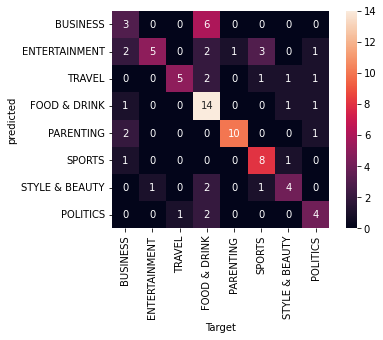

In [21]:
conf_matrix = confusion_matrix(predicted,df_test['category'],labels = ['BUSINESS','ENTERTAINMENT','FOOD & DRINK','PARENTING','POLITICS','SPORTS','STYLE & BEAUTY','TRAVEL'])

# Print the confusion matrix using Matplotlib
labels = ['BUSINESS','ENTERTAINMENT','FOOD & DRINK','PARENTING','POLITICS','SPORTS','STYLE & BEAUTY','TRAVEL']
sns.heatmap(conf_matrix.T,square=True, annot=True, fmt='d', cbar=True,
                    xticklabels=set(labels),
                    yticklabels=set(labels))
plt.xlabel('Target')
plt.ylabel('predicted')

# Part 3: Perceptron

In [22]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', Perceptron(tol=1e-3, random_state=0)),
])
# Fitting our train data to the pipeline
text_clf.fit(docs_train, df_train['category'])

# Predicting our test data
predicted = text_clf.predict(docs_test)
print(classification_report(df_test['category'],predicted ))

                precision    recall  f1-score   support

      BUSINESS       0.60      0.33      0.43         9
 ENTERTAINMENT       0.56      0.36      0.43        14
  FOOD & DRINK       0.78      0.70      0.74        10
     PARENTING       0.50      0.65      0.56        17
      POLITICS       0.45      0.77      0.57        13
        SPORTS       0.60      0.60      0.60        10
STYLE & BEAUTY       0.33      0.25      0.29         8
        TRAVEL       0.38      0.71      0.50         7
    WORLD NEWS       0.67      0.18      0.29        11

      accuracy                           0.52        99
     macro avg       0.54      0.51      0.49        99
  weighted avg       0.55      0.52      0.50        99



Text(83.40000000000006, 0.5, 'predicted')

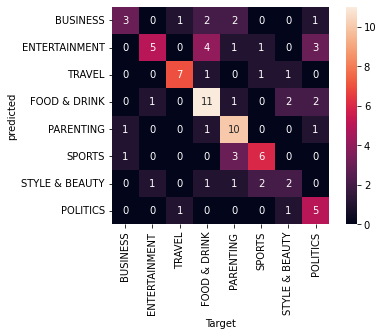

In [23]:
conf_matrix = confusion_matrix(predicted,df_test['category'],labels = ['BUSINESS','ENTERTAINMENT','FOOD & DRINK','PARENTING','POLITICS','SPORTS','STYLE & BEAUTY','TRAVEL'])

# Print the confusion matrix using Matplotlib
labels = ['BUSINESS','ENTERTAINMENT','FOOD & DRINK','PARENTING','POLITICS','SPORTS','STYLE & BEAUTY','TRAVEL']
sns.heatmap(conf_matrix.T,square=True, annot=True, fmt='d', cbar=True,
                    xticklabels=set(labels),
                    yticklabels=set(labels))
plt.xlabel('Target')
plt.ylabel('predicted')

# Part 4: SVM

In [24]:
param_grid = {'C': np.arange(0.1,1,0.1)}
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', GridSearchCV(LinearSVC(tol=1e-5),param_grid,refit=True,verbose=2)),
])
# Fitting our train data to the pipeline
text_clf.fit(docs_train, df_train['category'])

# Predicting our test data
predicted = text_clf.predict(docs_test)
print(classification_report(df_test['category'],predicted ))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................C=0.30000000000000004; total time=   0.0s
[CV] END ..............................C=0.300000

In [25]:
print(text_clf[2].best_estimator_)

LinearSVC(C=0.4, tol=1e-05)


Text(83.40000000000006, 0.5, 'predicted')

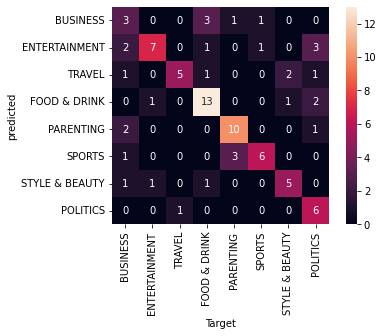

In [26]:
conf_matrix = confusion_matrix(predicted,df_test['category'],labels = ['BUSINESS','ENTERTAINMENT','FOOD & DRINK','PARENTING','POLITICS','SPORTS','STYLE & BEAUTY','TRAVEL'])

# Print the confusion matrix using Matplotlib
labels = ['BUSINESS','ENTERTAINMENT','FOOD & DRINK','PARENTING','POLITICS','SPORTS','STYLE & BEAUTY','TRAVEL']
sns.heatmap(conf_matrix.T,square=True, annot=True, fmt='d', cbar=True,
                    xticklabels=set(labels),
                    yticklabels=set(labels))
plt.xlabel('Target')
plt.ylabel('predicted')

In [31]:
labels = text_clf[2].best_estimator_.classes_
feature_names = text_clf[0].get_feature_names()

In [32]:
top_10_words = [text_clf[2].best_estimator_.coef_[t].argsort()[:-11:-1] for t in range(9)]
top_10_eff = [np.sort(text_clf[2].best_estimator_.coef_[t])[:-11:-1] for t in range(9)]
for t in range(9):
    print("topic:",labels[t] )
    print("   keywords:%s" % ",".join(feature_names[top_10_words[t][j]] for j in range(10)))

topic: BUSINESS
   keywords:financial,want,company,money,randomly,organization,business,private,help,conversational
topic: ENTERTAINMENT
   keywords:film,belieb,batman,show,star,look,watch,music,miley,cyrus
topic: FOOD & DRINK
   keywords:cocktail,chocolate,food,chicken,delicious,recipe,apple,hot,whiskey,sauce
topic: PARENTING
   keywords:child,kid,parent,mom,daughter,know,need,toddler,baby,age
topic: POLITICS
   keywords:obama,gop,court,democrats,issue,political,say,justice,police,cop
topic: SPORTS
   keywords:game,nfl,player,johnson,odom,bowl,nba,ncaa,players,perseverance
topic: STYLE & BEAUTY
   keywords:photos,style,kate,week,wear,fashion,gift,green,skin,dress
topic: TRAVEL
   keywords:travel,airline,park,city,beach,mexico,world,hotel,event,italian
topic: WORLD NEWS
   keywords:country,iran,attack,president,nuclear,syria,medium,ai,news,deadly


In [33]:
feature_imp = []
for i in range(9):
    feature_imp.append([0] * 10)
for i in range(9):
    for j in range(10):
       feature_imp[i][j]=feature_names[top_10_words[i][j]]

<Figure size 432x288 with 0 Axes>

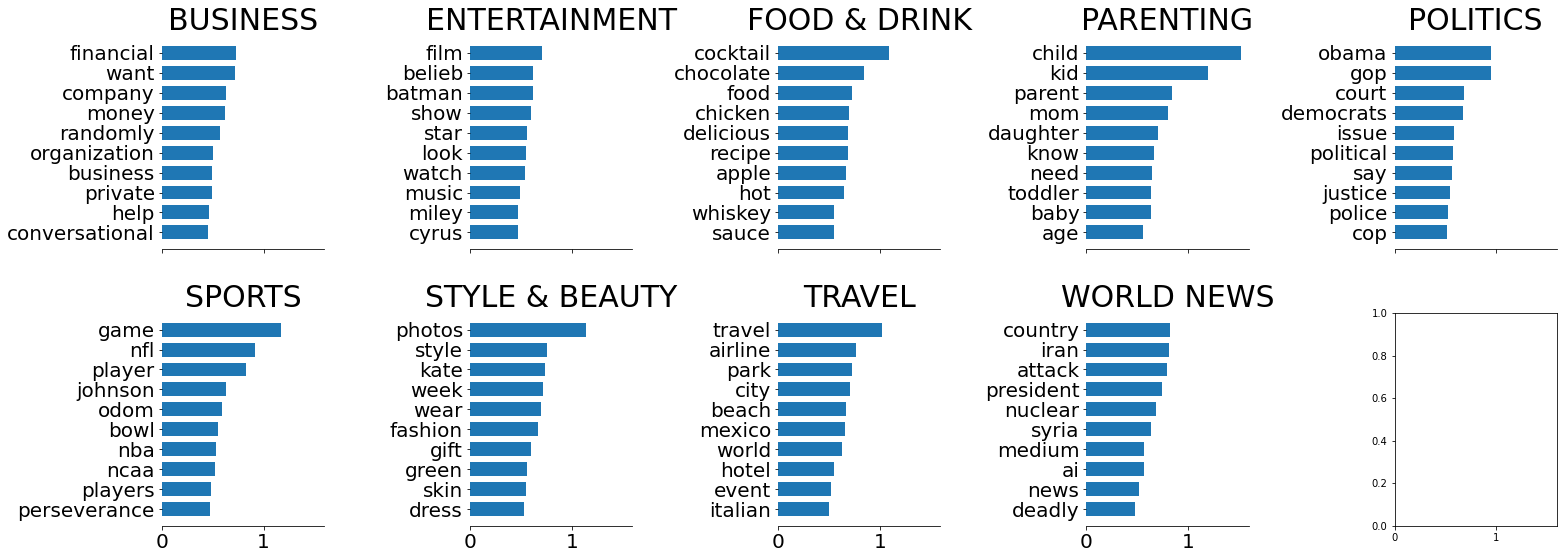

In [34]:
    plt.clf()
    cols = 5
    rows = 10 // 5 + 10 % 5
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), sharex=True)
    axes = axes.flatten()
    for i in range(9):
        weights =  top_10_eff[i]
        ax = axes[i]
        ax.barh(feature_imp[i], weights, height=0.7)
        ax.set_title(labels[i],
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(t = '',fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

# Part 5: Decision Tree

In [35]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier(criterion="gini", 
                             splitter='random'))
])
# Fitting our train data to the pipeline
text_clf.fit(docs_train, df_train['category'])

# Predicting our test data
predicted = text_clf.predict(docs_test)

print(classification_report(df_test['category'],predicted ))

                precision    recall  f1-score   support

      BUSINESS       0.17      0.11      0.13         9
 ENTERTAINMENT       0.31      0.64      0.42        14
  FOOD & DRINK       0.62      0.50      0.56        10
     PARENTING       0.71      0.59      0.65        17
      POLITICS       0.50      0.31      0.38        13
        SPORTS       0.50      0.60      0.55        10
STYLE & BEAUTY       0.43      0.38      0.40         8
        TRAVEL       0.30      0.43      0.35         7
    WORLD NEWS       0.80      0.36      0.50        11

      accuracy                           0.45        99
     macro avg       0.48      0.44      0.44        99
  weighted avg       0.51      0.45      0.46        99



Text(83.40000000000006, 0.5, 'predicted')

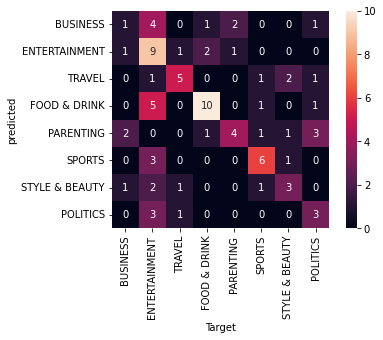

In [36]:
conf_matrix = confusion_matrix(predicted,df_test['category'],labels = ['BUSINESS','ENTERTAINMENT','FOOD & DRINK','PARENTING','POLITICS','SPORTS','STYLE & BEAUTY','TRAVEL'])

# Print the confusion matrix using Matplotlib
labels = ['BUSINESS','ENTERTAINMENT','FOOD & DRINK','PARENTING','POLITICS','SPORTS','STYLE & BEAUTY','TRAVEL']
sns.heatmap(conf_matrix.T,square=True, annot=True, fmt='d', cbar=True,
                    xticklabels=set(labels),
                    yticklabels=set(labels))
plt.xlabel('Target')
plt.ylabel('predicted')

# Part 6: Random Forest

In [37]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(criterion ='gini',random_state=1,n_estimators=100))
])
# Fitting our train data to the pipeline
text_clf.fit(docs_train, df_train['category'])

# Predicting our test data
predicted = text_clf.predict(docs_test)

print(classification_report(df_test['category'],predicted ))

                precision    recall  f1-score   support

      BUSINESS       0.00      0.00      0.00         9
 ENTERTAINMENT       0.20      0.29      0.24        14
  FOOD & DRINK       0.44      0.40      0.42        10
     PARENTING       0.75      0.71      0.73        17
      POLITICS       0.75      0.69      0.72        13
        SPORTS       0.39      0.70      0.50        10
STYLE & BEAUTY       0.62      0.62      0.62         8
        TRAVEL       0.50      0.43      0.46         7
    WORLD NEWS       1.00      0.36      0.53        11

      accuracy                           0.48        99
     macro avg       0.52      0.47      0.47        99
  weighted avg       0.54      0.48      0.49        99



Text(83.40000000000006, 0.5, 'predicted')

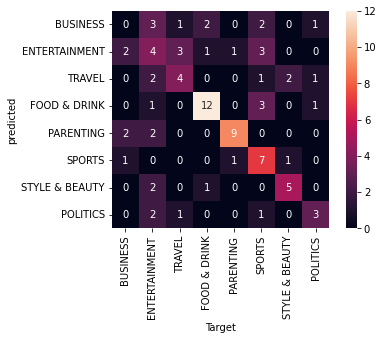

In [38]:
conf_matrix = confusion_matrix(predicted,df_test['category'],labels = ['BUSINESS','ENTERTAINMENT','FOOD & DRINK','PARENTING','POLITICS','SPORTS','STYLE & BEAUTY','TRAVEL'])

# Print the confusion matrix using Matplotlib
labels = ['BUSINESS','ENTERTAINMENT','FOOD & DRINK','PARENTING','POLITICS','SPORTS','STYLE & BEAUTY','TRAVEL']
sns.heatmap(conf_matrix.T,square=True, annot=True, fmt='d', cbar=True,
                    xticklabels=set(labels),
                    yticklabels=set(labels))
plt.xlabel('Target')
plt.ylabel('predicted')